In [3]:
import tensorflow as tf
from keras.src import layers
from keras.src.callbacks import EarlyStopping, ReduceLROnPlateau
import keras
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocess data
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Reshape to (28, 28, 1) for CNN
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [6]:

model = keras.Sequential([
    layers.Input((28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (5, 5), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (5, 5), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(128, (4, 4), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

In [7]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
early_stop = EarlyStopping(monitor="val_accuracy", patience=6, restore_best_weights=True)

lr_schedule = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_images,
    train_labels,
    epochs=100,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop, lr_schedule],
)


Epoch 1/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.8902 - loss: 0.3752 - val_accuracy: 0.9888 - val_loss: 0.0390 - learning_rate: 0.0010
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9823 - loss: 0.0586 - val_accuracy: 0.9878 - val_loss: 0.0397 - learning_rate: 0.0010
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9877 - loss: 0.0404 - val_accuracy: 0.9892 - val_loss: 0.0395 - learning_rate: 0.0010
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9889 - loss: 0.0362 - val_accuracy: 0.9930 - val_loss: 0.0238 - learning_rate: 0.0010
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9907 - loss: 0.0309 - val_accuracy: 0.9927 - val_loss: 0.0257 - learning_rate: 0.0010
Epoch 6/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9938 - val_loss: 0.0245 - learning_rate: 0.0010
Epoch 7/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9922 - los

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9966 - loss: 0.0179

Test accuracy: 0.9973


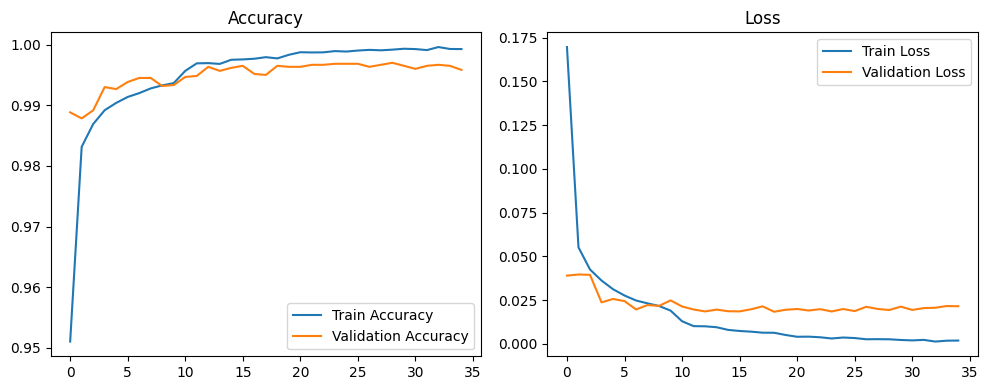

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

**Performance Summary**

Validation Accuracy: 99.56%

Test Accuracy: 99.73%

Input Shape: (28, 28, 1)

**Model Architecture**


Convolutional Layers: 9 layers grouped into 3 blocks

Downsampling: Strided convolutions (stride=2), no pooling layers

Normalization: BatchNormalization after each convolution

Regularization: Dropout (0.4) after each block

Feature Reduction: GlobalAveragePooling2D

Output Layer: Dense(10) with softmax activation



**Training Setup**

Optimizer: RMSprop (lr=0.001, ρ=0.9)

Loss Function: Sparse Categorical
Crossentropy

Batch Size: 64

Epochs: Up to 100 (early stopped at 35)

Learning Rate Schedule: ReduceLROnPlateau (patience=3, factor=0.5)

**Key Learnings**

Starting with a single conv layer + pooling yields high MNIST accuracy quickly.

Stacking multiple conv layers before downsampling improves feature learning but increases overfitting risk.

Dropout and BatchNormalization effectively mitigate overfitting.

Experimenting with hyperparameters and layer configurations is crucial.

Smaller batch sizes enhance generalization.

Stacked 3×3 kernels improve feature extraction through added non-linearity.

5×5 kernels with stride 2 serve both as feature extractors and dimensionality reducers